<a href="https://colab.research.google.com/github/MoAlsayed/Chicago-Crimes-analysis/blob/main/Chicago_Crime_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name: Processing Chicago crime data

## Author: Mohammed Alsayed



#### Dataset represents crimes records from 2001 to 2022.

# Import necessary libraries, mount the drive, and load the data.

In [56]:
pip install pmdarima;

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import ndiffs, nsdiffs
# set random seed
SEED = 321
np.random.seed(SEED)

sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize']=(12,3)

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [21]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
from io import BytesIO
import zipfile

def read_and_concat_zip(zip_path):
    # Create an empty DataFrame to store the concatenated data
    concatenated_df = pd.DataFrame()

    # Open the ZIP file and loop through each file
    with zipfile.ZipFile(zip_path, 'r') as zip_file:
        for file_name in zip_file.namelist():
            # Read the CSV file from the ZIP archive
            with zip_file.open(file_name) as file:
                # Use BytesIO to read the file content
                file_content = BytesIO(file.read())

                # Read the CSV content into a DataFrame
                df = pd.read_csv(file_content)

                # Concatenate the DataFrame to the main DataFrame
                concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

    return concatenated_df

# Replace 'your_zip_file.zip' with the actual path to your ZIP file
zip_file_path = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week14/Data/Chicago_Crime_2001-2022.zip'

# Call the function to read and concatenate CSV files from the ZIP file
result_df = read_and_concat_zip(zip_file_path)

# Display the result
pd.set_option('display.max_columns',100)
# print(result_df)
result_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Source URL:
0,1326041.0,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624.0,16.0,NaN,41.957850,-87.749185,NaN
1,1319931.0,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825.0,8.0,NaN,41.783892,-87.684841,NaN
2,1324743.0,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313.0,3.0,NaN,41.780412,-87.611970,NaN
3,1310717.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424.0,24.0,NaN,42.012391,-87.678032,NaN
4,1318099.0,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214.0,2.0,NaN,41.819538,-87.620020,NaN


In [23]:
result_df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude', 'Source URL: '],
      dtype='object')

# Explore and process the data

In [24]:
df = result_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713119 entries, 0 to 7713118
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    float64
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                object 
 6   Domestic              object 
 7   Beat                  float64
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  Source URL:           object 
dtypes: float64(6), object(7)
memory usage: 765.0+ MB


In [25]:
df['DateTime'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713119 entries, 0 to 7713118
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    float64       
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                object        
 6   Domestic              object        
 7   Beat                  float64       
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Source URL:           object        
 13  DateTime              datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 823.9+ MB


In [26]:
# Make Date the index
df = df.set_index('DateTime')

# Part 1: Answering some client questions:


- Q1: Which district has the highest crimes in 2022, and which one has the lowes?
- Q2: Do number of crimes increase over years or not?
- Q3: Which period of the day (PM or AM) has higher number of crimes occurances?
- Q4: What type of crimes happen most frequently?

In [28]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude', 'Source URL: '],
      dtype='object')

In [30]:
# Drop unecessary columns
# Specify the list of unnecessary columns to drop
columns_to_drop = ['Latitude', 'Longitude', 'Source URL: ', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'Ward', 'Date']

# Drop the unnecessary columns
df_P1 = df.drop(columns=columns_to_drop)
df_P1.head()

,ID,Primary Type,District
DateTime,,,
2001-01-01 01:00:00,1326041.0,BATTERY,16.0
2001-01-01 13:00:00,1319931.0,BATTERY,8.0
2001-01-01 13:00:00,1324743.0,GAMBLING,3.0
2001-01-01 01:00:00,1310717.0,CRIMINAL DAMAGE,24.0
2001-01-01 01:00:00,1318099.0,BATTERY,2.0


In [33]:
df_P1.columns

Index(['ID', 'Primary Type', 'District'], dtype='object')

In [34]:
# check the unique values in the data to consider the ID as a counter later
# Display the count of unique values for each column
columns = df_P1.columns
for column in columns:
    unique_count = df_P1[column].nunique()
    print(f"Number of unique values in {column}: {unique_count}")

Number of unique values in ID: 7713109
Number of unique values in Primary Type: 36
Number of unique values in District: 24


In [35]:
# Drop replicated ID's
# Identify and drop rows with duplicated values in 'Column1'
df_P1 = df_P1[~df_P1['ID'].duplicated(keep='first')]
df_P1.head()

,ID,Primary Type,District
DateTime,,,
2001-01-01 01:00:00,1326041.0,BATTERY,16.0
2001-01-01 13:00:00,1319931.0,BATTERY,8.0
2001-01-01 13:00:00,1324743.0,GAMBLING,3.0
2001-01-01 01:00:00,1310717.0,CRIMINAL DAMAGE,24.0
2001-01-01 01:00:00,1318099.0,BATTERY,2.0


In [36]:
df_P1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713110 entries, 2001-01-01 01:00:00 to NaT
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            float64
 1   Primary Type  object 
 2   District      float64
dtypes: float64(2), object(1)
memory usage: 235.4+ MB


In [37]:
df_22 = df_P1.loc['2022']
df_22.head()

,ID,Primary Type,District
DateTime,,,
2022-01-01 13:00:00,12582293.0,THEFT,1.0
2022-01-01 13:00:00,12607313.0,DECEPTIVE PRACTICE,8.0
2022-01-01 01:00:00,12585671.0,CRIMINAL DAMAGE,5.0
2022-01-01 01:00:00,12592889.0,OTHER OFFENSE,4.0
2022-01-01 01:00:00,12584977.0,THEFT,18.0


In [38]:
df_22_grouped = df_22.groupby('District').count()
df_22_grouped.head()

,ID,Primary Type
District,,
1.0,13044,13044
2.0,11793,11793
3.0,11937,11937
4.0,13931,13931
5.0,9773,9773


In [39]:
df_22_grouped = df_22.groupby('District').resample('D').count()
df_22_grouped.head(5)

ID  Primary Type  District
District DateTime                              
1.0      2022-01-01  34            34        34
         2022-01-02  36            36        36
         2022-01-03  29            29        29
         2022-01-04  37            37        37
         2022-01-05  15            15        15

In [40]:
df_22_unstacked = df_22_grouped['ID'].unstack(level=0)
df_22_unstacked

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,25.0,31.0
DateTime,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,34.0,37.0,34.0,31.0,24.0,58.0,47.0,42.0,45.0,33.0,44.0,38.0,21.0,27.0,19.0,19.0,57.0,39.0,11.0,32.0,31.0,35.0,NaN
2022-01-02,36.0,19.0,18.0,23.0,16.0,29.0,20.0,30.0,12.0,15.0,21.0,17.0,13.0,11.0,10.0,10.0,32.0,18.0,9.0,14.0,15.0,17.0,NaN
2022-01-03,29.0,24.0,19.0,28.0,21.0,19.0,23.0,25.0,25.0,15.0,17.0,14.0,19.0,15.0,13.0,9.0,26.0,20.0,7.0,13.0,14.0,28.0,NaN
2022-01-04,37.0,24.0,15.0,37.0,26.0,33.0,20.0,23.0,29.0,18.0,21.0,21.0,12.0,11.0,15.0,15.0,25.0,28.0,8.0,19.0,20.0,17.0,NaN
2022-01-05,15.0,26.0,22.0,33.0,20.0,21.0,18.0,20.0,16.0,15.0,17.0,23.0,15.0,14.0,18.0,17.0,20.0,20.0,12.0,13.0,19.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,25.0,34.0,27.0,40.0,22.0,24.0,25.0,45.0,20.0,16.0,36.0,31.0,19.0,11.0,37.0,25.0,30.0,29.0,14.0,15.0,18.0,40.0,NaN
2022-12-28,37.0,37.0,24.0,49.0,23.0,41.0,29.0,44.0,28.0,24.0,25.0,37.0,14.0,22.0,26.0,17.0,28.0,20.0,5.0,20.0,31.0,37.0,NaN
2022-12-29,39.0,45.0,34.0,50.0,22.0,41.0,34.0,39.0,23.0,22.0,23.0,49.0,8.0,16.0,25.0,18.0,37.0,29.0,23.0,19.0,21.0,31.0,NaN


In [41]:
df_22_unstacked_sum = df_22_grouped['ID'].unstack(level=0).sum().sort_values()
df_22_unstacked_sum

District
31.0       15.0
20.0     4960.0
17.0     6997.0
22.0     7671.0
14.0     8158.0
15.0     8308.0
24.0     8469.0
16.0     9226.0
5.0      9773.0
10.0     9961.0
7.0     10319.0
9.0     10376.0
2.0     11793.0
3.0     11937.0
25.0    11951.0
19.0    12243.0
18.0    12429.0
1.0     13044.0
11.0    13457.0
4.0     13931.0
12.0    14341.0
6.0     14694.0
8.0     14805.0
dtype: float64

## Explore the crime type trend over years

In [42]:
df_P1.columns

Index(['ID', 'Primary Type', 'District'], dtype='object')

In [43]:
df_PT = df_P1.groupby('Primary Type').resample('A').count()
df_PT.head(5)

ID  Primary Type  District
Primary Type DateTime                                
ARSON        2001-12-31  1011          1011      1011
             2002-12-31  1032          1032      1032
             2003-12-31   955           955       955
             2004-12-31   778           778       778
             2005-12-31   691           691       691

In [44]:
df_PT_unstacked_sum = df_PT['ID'].unstack(level=0)
df_PT_unstacked_sum

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31384.0,93461.0,26014.0,1.0,1779.0,55859.0,29.0,13241.0,14949.0,1.0,934.0,667.0,NaN,406.0,279.0,933.0,1637.0,27553.0,50567.0,NaN,NaN,NaN,19.0,2263.0,6.0,29662.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13732.0,NaN,971.0,658.0,NaN,361.0,337.0,829.0,1414.0,25121.0,51789.0,NaN,NaN,NaN,26.0,2594.0,5.0,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003-12-31,955.0,29477.0,88380.0,25157.0,0.0,1571.0,55011.0,41.0,14807.0,13459.0,NaN,1088.0,604.0,NaN,409.0,364.0,705.0,1311.0,22748.0,54288.0,NaN,1.0,NaN,16.0,3047.0,2.0,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1538.0,53164.0,42.0,15913.0,13255.0,NaN,1122.0,455.0,NaN,531.0,349.0,482.0,985.0,22805.0,57060.0,NaN,0.0,NaN,13.0,3099.0,9.0,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1521.0,54548.0,37.0,16655.0,13590.0,NaN,1078.0,453.0,NaN,615.0,258.0,389.0,1005.0,22497.0,56234.0,NaN,0.0,NaN,19.0,2906.0,9.0,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0
2006-12-31,726.0,25945.0,80666.0,24324.0,0.0,1439.0,57124.0,47.0,14505.0,13606.0,NaN,1368.0,476.0,NaN,758.0,276.0,339.0,1135.0,21818.0,55813.0,NaN,0.0,NaN,17.0,2783.0,9.0,27101.0,7034.0,4.0,3068.0,7.0,15968.0,1576.0,186.0,86240.0,3821.0
2007-12-31,712.0,26313.0,79593.0,24858.0,0.0,1507.0,53749.0,53.0,13699.0,14170.0,NaN,1409.0,448.0,NaN,677.0,255.0,329.0,1170.0,18573.0,54454.0,NaN,0.0,NaN,12.0,2921.0,12.0,26863.0,6087.0,5.0,3315.0,1.0,15450.0,1529.0,213.0,85156.0,3554.0
2008-12-31,644.0,25448.0,75930.0,26218.0,0.0,1515.0,52843.0,47.0,12310.0,14933.0,NaN,1199.0,513.0,NaN,580.0,261.0,359.0,912.0,18881.0,46506.0,NaN,0.0,NaN,13.0,2661.0,12.0,26532.0,5141.0,4.0,3013.0,0.0,16703.0,1501.0,190.0,88437.0,3877.0
2009-12-31,616.0,22861.0,68460.0,26767.0,0.0,1401.0,47725.0,42.0,10851.0,13877.0,NaN,991.0,461.0,NaN,573.0,231.0,293.0,746.0,15482.0,43542.0,NaN,1.0,NaN,21.0,2632.0,7.0,25601.0,3940.0,10.0,3147.0,0.0,15981.0,1265.0,168.0,80976.0,4159.0


In [45]:
# sum the values of all crimes per year
# Sum the values of all columns into a new column
df_PT_unstacked_sum['Crime_Sum'] = df_PT_unstacked_sum.sum(axis=1)
df_PT_unstacked_sum.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Crime_Sum
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31384.0,93461.0,26014.0,1.0,1779.0,55859.0,29.0,13241.0,14949.0,1.0,934.0,667.0,NaN,406.0,279.0,933.0,1637.0,27553.0,50567.0,NaN,NaN,NaN,19.0,2263.0,6.0,29662.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0,485886.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13732.0,NaN,971.0,658.0,NaN,361.0,337.0,829.0,1414.0,25121.0,51789.0,NaN,NaN,NaN,26.0,2594.0,5.0,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0,486807.0
2003-12-31,955.0,29477.0,88380.0,25157.0,0.0,1571.0,55011.0,41.0,14807.0,13459.0,NaN,1088.0,604.0,NaN,409.0,364.0,705.0,1311.0,22748.0,54288.0,NaN,1.0,NaN,16.0,3047.0,2.0,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0,475985.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1538.0,53164.0,42.0,15913.0,13255.0,NaN,1122.0,455.0,NaN,531.0,349.0,482.0,985.0,22805.0,57060.0,NaN,0.0,NaN,13.0,3099.0,9.0,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0,469422.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1521.0,54548.0,37.0,16655.0,13590.0,NaN,1078.0,453.0,NaN,615.0,258.0,389.0,1005.0,22497.0,56234.0,NaN,0.0,NaN,19.0,2906.0,9.0,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0,453773.0


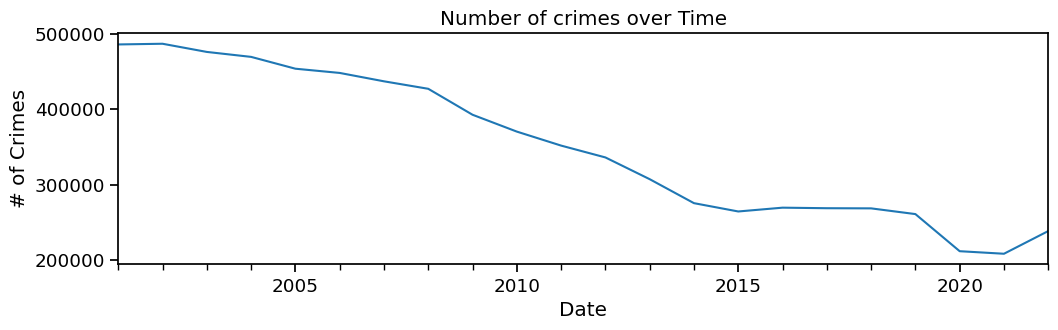

In [48]:
# Plot a specific column (e.g., 'Value')
df_PT_unstacked_sum['Crime_Sum'].plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('# of Crimes')
plt.title('Number of crimes over Time')

# Display the plot
plt.show()

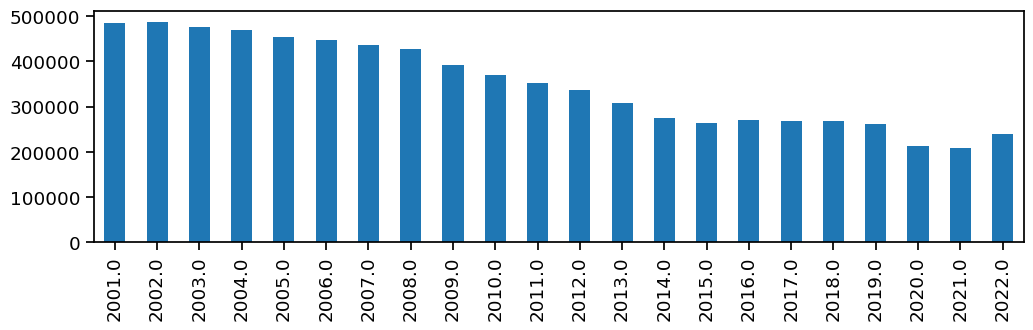

In [53]:
# explore the number of crimes over 24 hours window
years = df_P1.index.year
years.value_counts().sort_index().plot(kind='bar');

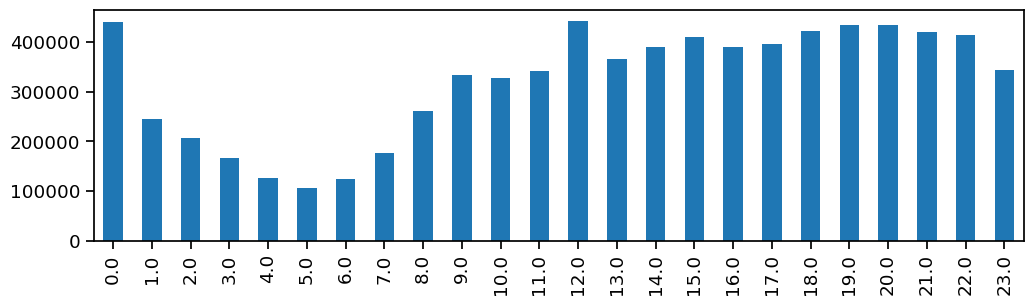

In [50]:
hours = df.index.hour
hours.value_counts().sort_index().plot(kind='bar');

In [54]:
df_P1.head()

,ID,Primary Type,District
DateTime,,,
2001-01-01 01:00:00,1326041.0,BATTERY,16.0
2001-01-01 13:00:00,1319931.0,BATTERY,8.0
2001-01-01 13:00:00,1324743.0,GAMBLING,3.0
2001-01-01 01:00:00,1310717.0,CRIMINAL DAMAGE,24.0
2001-01-01 01:00:00,1318099.0,BATTERY,2.0


In [55]:
## Inspect the value_counts for the different types of crimes
crime_counts = df_P1['Primary Type'].value_counts().to_frame('Total # of Crimes')
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


## Answers to client question:

* District 8 had the highest number of crimes in 2022, and district 31 had the lowest.
* Total number of Crimes is decreasing overtime.
* On average, the night hours when people are sleeping has the lowest number of crimes, while the evening hours has the highest.
- Theft, Battery, and Criminal Damage are the most frequent crimes